In [15]:
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import sine_data
from layers.layer_dense import Layer_Dense
from activation_func.linear import Activation_Linear
from loss.mean_square_error_loss import Loss_MeanSquaredError
from optimizers.adam import Optimizer_Adam
from activation_func.relu import Activation_ReLU
import numpy as np
import matplotlib.pyplot as plt

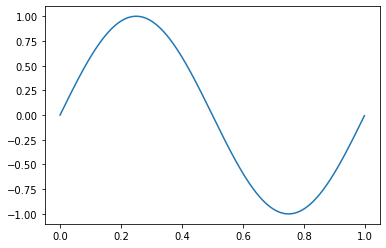

In [46]:
#load
nnfs.init()
X, y = sine_data()

#visualize 
plt.plot(X, y)
plt.show()

In [53]:
#hyper-parameters init 
X, y = sine_data()
dense1 = Layer_Dense(1, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 64)
activation2 = Activation_ReLU()
dense3 = Layer_Dense(64, 1)
activation3 = Activation_Linear()
loss_function = Loss_MeanSquaredError()
optimizer = Optimizer_Adam()
accuracy_precision = np.std(y) / 250

    -Note: this example probably won't work if we don't comment out  the accumulated sum since the code is from older chapter    

In [55]:
epochs=1000
for epoch in range(epochs):
    
    dense1.forward(X,training=True)
    activation1.forward(dense1.output,training=True)
    dense2.forward(activation1.output,training=True)
    activation2.forward(dense2.output,training=True)
    dense3.forward(activation2.output,training=True)
    activation3.forward(dense3.output,training=True)
    loss = loss_function.calculate(activation3.output, y)

    predictions = activation3.output
    accuracy = np.mean(np.absolute(predictions - y) <accuracy_precision)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f} (' +
        f'lr: {optimizer.current_learning_rate}')


    #backward pass 
    loss_function.backward(activation3.output, y)
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()


epoch: 0, acc: 0.002, loss: 0.500 (lr: 0.001
epoch: 100, acc: 0.004, loss: 0.189 (lr: 0.001
epoch: 200, acc: 0.004, loss: 0.115 (lr: 0.001
epoch: 300, acc: 0.006, loss: 0.106 (lr: 0.001
epoch: 400, acc: 0.007, loss: 0.082 (lr: 0.001
epoch: 500, acc: 0.009, loss: 0.065 (lr: 0.001
epoch: 600, acc: 0.045, loss: 0.049 (lr: 0.001
epoch: 700, acc: 0.027, loss: 0.028 (lr: 0.001
epoch: 800, acc: 0.104, loss: 0.013 (lr: 0.001
epoch: 900, acc: 0.300, loss: 0.006 (lr: 0.001


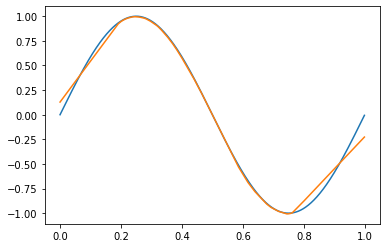

In [57]:
X_test, y_test = sine_data()

dense1.forward(X_test,training=False)
activation1.forward(dense1.output,training=False)
dense2.forward(activation1.output,training=False)
activation2.forward(dense2.output,training=False)
dense3.forward(activation2.output,training=False)
activation3.forward(dense3.output,training=False)

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.output)
plt.show()